In [157]:

from collections import namedtuple
from typing import List, Tuple, Union
import matplotlib.pyplot as plt
import numpy as np

def forward(x):
    return x**(1/2)

def inverse(x):
    return x**2
def compute_eer(scores: Union[np.ndarray, List[float]],
                labels: Union[np.ndarray, List[int]],
                det_pic_save_path=None,
                roc_pic_save_path=None) -> Tuple[
                    float, float, np.ndarray, np.ndarray]:
    """Compute equal error rate(EER) given matching scores and corresponding labels

    Parameters:
        scores(np.ndarray,list): the cosine similarity between two speaker embeddings.
        labels(np.ndarray,list): the labels of the speaker pairs, with value 1 indicates same speaker and 0 otherwise.

    Returns:
        eer(float):  the equal error rate.
        thresh_for_eer(float): the thresh value at which false acceptance rate equals to false rejection rate.
        fr_rate(np.ndarray): the false rejection rate as a function of increasing thresholds.
        fa_rate(np.ndarray): the false acceptance rate as a function of increasing thresholds.

     """
    if isinstance(labels, list):
        labels = np.array(labels)
    if isinstance(scores, list):
        scores = np.array(scores)
    label_set = list(np.unique(labels))
    assert len(
        label_set
    ) == 2, f'the input labels must contains both two labels, but recieved set(labels) = {label_set}'
    label_set.sort()
    assert label_set == [
        0, 1
    ], 'the input labels must contain 0 and 1 for distinct and identical id. '
    eps = 1e-8
    #assert np.min(scores) >= -1.0 - eps and np.max(
    #    scores
    #  ) < 1.0 + eps, 'the score must be in the range between -1.0 and 1.0'
    same_id_scores = scores[labels == 1]
    diff_id_scores = scores[labels == 0]
    thresh = np.linspace(0,1, 1000) # np.min(diff_id_scores),np.max(same_id_scores)
    thresh = np.expand_dims(thresh, 1)
    fr_matrix = same_id_scores < thresh
    fa_matrix = diff_id_scores >= thresh
    fr_rate = np.mean(fr_matrix, 1)
    fa_rate = np.mean(fa_matrix, 1)
    tr_rate = 1 - fr_rate
    thresh_idx = np.argmin(np.abs(fa_rate - fr_rate))
    result = namedtuple('speaker', ('eer', 'thresh', 'fa', 'fr'))
    result.eer = (fr_rate[thresh_idx] + fa_rate[thresh_idx]) / 2
    result.thresh = thresh[thresh_idx, 0]
    result.fr = fr_rate
    result.fa = fa_rate

    # plot det curve
    if det_pic_save_path:
        plt.figure()
        plt.plot(fa_rate, fr_rate)
        plt.xlabel(r'$FA\ Rate$')
        plt.ylabel(r'$FR\ Rate$')

        plt.xscale('function', functions=(forward,inverse))
        plt.yscale('function', functions=(forward,inverse))
        # set x trick
        plt.xticks([0, 0.01, 0.05, 0.1, 0.2, 0.5])
        plt.yticks([0, 0.01, 0.05, 0.1, 0.2, 0.5])
        # set range 0~0.5
        plt.xlim(0, 0.5)
        plt.ylim(0, 0.5)
        
        # plot x==y dot line, red
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        # plot eer point, blue with value text
        plt.plot(result.eer, result.eer, 'bo')
        plt.text(result.eer, result.eer, f'(EER={result.eer*100:.2f}%)')
        # plt.yscale('log')
        plt.savefig(det_pic_save_path)
        # plt.show()
    if roc_pic_save_path:
        plt.figure()
        plt.plot(fa_rate, tr_rate)
        plt.xlabel('fa_rate')
        plt.ylabel('tr_rate')
        plt.savefig(roc_pic_save_path)
        # plt.show()
    

    return result

In [179]:

from collections import namedtuple
from typing import List, Tuple, Union
import matplotlib.pyplot as plt
import numpy as np

def forward(x):
    return x**(1/2)

def inverse(x):
    return x**2
def compare_eer(scores_list,labels_list,name_list):
    plt.figure()
    plt.xlabel(r'$FA\ Rate$')
    plt.ylabel(r'$FR\ Rate$')

    for scores,labels,name in zip(scores_list,labels_list,name_list):
        print(name)
        if isinstance(labels, list):
            labels = np.array(labels)
        if isinstance(scores, list):
            scores = np.array(scores)
        label_set = list(np.unique(labels))
        print(f"set(labels) = {label_set}")
        print(f"Label shape: {labels.shape}")
        print(f"Score shape: {scores.shape}")
        assert len(
            label_set
        ) == 2, f'the input labels must contains both two labels, but recieved set(labels) = {label_set}'
        label_set.sort()
        assert label_set == [
            0, 1
        ], 'the input labels must contain 0 and 1 for distinct and identical id. '
        eps = 1e-8
        #assert np.min(scores) >= -1.0 - eps and np.max(
        #    scores
        #  ) < 1.0 + eps, 'the score must be in the range between -1.0 and 1.0'
        same_id_scores = scores[labels == 1]
        diff_id_scores = scores[labels == 0]
        thresh = np.linspace(0,1, 1000) # np.min(diff_id_scores),np.max(same_id_scores)
        thresh = np.expand_dims(thresh, 1)
        fr_matrix = same_id_scores < thresh
        fa_matrix = diff_id_scores >= thresh
        fr_rate = np.mean(fr_matrix, 1)
        fa_rate = np.mean(fa_matrix, 1)
        tr_rate = 1 - fr_rate
        thresh_idx = np.argmin(np.abs(fa_rate - fr_rate))
        result = namedtuple('speaker', ('eer', 'thresh', 'fa', 'fr'))
        result.eer = (fr_rate[thresh_idx] + fa_rate[thresh_idx]) / 2
        result.thresh = thresh[thresh_idx, 0]
        result.fr = fr_rate
        result.fa = fa_rate
        plt.plot(fa_rate, fr_rate,label=name)
        

        
        # # plot eer point, blue with value text
        # plt.plot(result.eer, result.eer, 'bo')
        # plt.text(result.eer, result.eer, f'(EER={result.eer*100:.2f}%)')
    plt.xscale('function', functions=(forward,inverse))
    plt.yscale('function', functions=(forward,inverse))
    # set x trick
    plt.xticks([0, 0.01, 0.05, 0.1, 0.2, 0.5])
    plt.yticks([0, 0.01, 0.05, 0.1, 0.2, 0.5])
    # set range 0~0.5
    plt.xlim(0, 0.5)
    plt.ylim(0, 0.5)
    
    # plot x==y dot line, red
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.legend()
    plt.show()


In [182]:
scores = [np.load("../../cache/ecapa_speechbrain_8k/ecapa_speechbrain_8k_scores_0.npy"),np.load("../../cache/ecapa_speechbrain_16k/ecapa_speechbrain_16k_scores_0.npy")]
labels = [np.load("../../cache/ecapa_speechbrain_8k/ecapa_speechbrain_8k_labels_0.npy"),np.load("../../cache/ecapa_speechbrain_16k/ecapa_speechbrain_16k_labels_0.npy")]

8k
set(labels) = [0, 1]
Label shape: (292140,)
Score shape: (292140,)
16k
set(labels) = [0, 1]
Label shape: (292140,)
Score shape: (292140,)


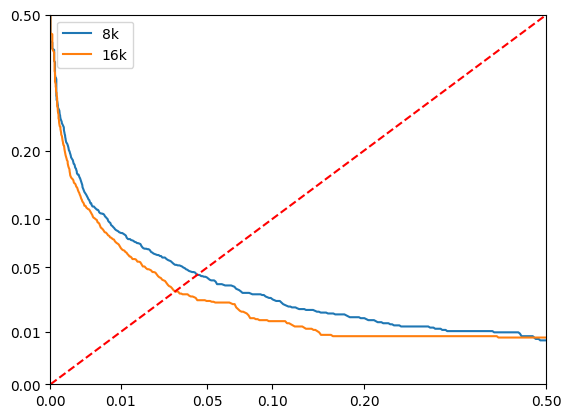

In [183]:
compare_eer(scores,labels,["8k","16k"])